# Demographic data of the interviewees
**This notebook is not executable,** the **single data points** of the demographic survey **are not included**, due to privacy reasons.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read an excel in the sa,e folder that is named Survey_responses.xlsx
# File that contains the survey responses IS NOT included in the repository
df = pd.read_excel('Survey_responses.xlsx')

In [ ]:
# rename columns to make it easier to work with	
df.columns = ['Unique ID', 'Name', 'Email', 'Date Taken', 'Time Taken', 'Browser', 'OS', 'City', 'Country', 'Referrer', 'Time Spent',\
              'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9-C/C++', 'Q9-C#', 'Q9-Java',\
              'Q9-Javascript','Q9-Julia','Q9-Python','Q9-R','Q9-RUST','Q9-Dart','Q9-Kotlin','Q9-Other','Q10-Supervised','Q10-Semi-supervised',\
              'Q10-RL', 'Q10-Unsupervised','Q10-Other', 'Q11-Rgression', 'Q11-Classification', 'Q11-Clustering', 'Q11-Transcription', 'Q11-Machine translation',\
              'Q11-Anomaly detection','Q11-Object detection','Q11-other', 'Q12-OS', 'Q12-Web apps', 'Q12-Mobile apps', 'Q12-Desktop apps', 'Q12-Middleware', 'Q12-Databases',\
              'Q12-Dev_tools', 'Q12-Recommender Sys.', 'Q12-Server side','Q12-Other', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19']
              

#### Note: The data presented in here contains the aggregated statistics of 13 out of the 14 participants of the interviews. 
This is due to, the email that was sent to contact possible participoants of the study, were asked to fill out the survey and the availability for the interview. One of the participants did not fill out the demographic survey, but did participate in the interviews. The participant has knowledge and experience in both ML and in the SE domains, the participant has also pusblished in multiple top venues (conferences and journals) of SE.

### Q1 - How many years of experience in software development do you have?

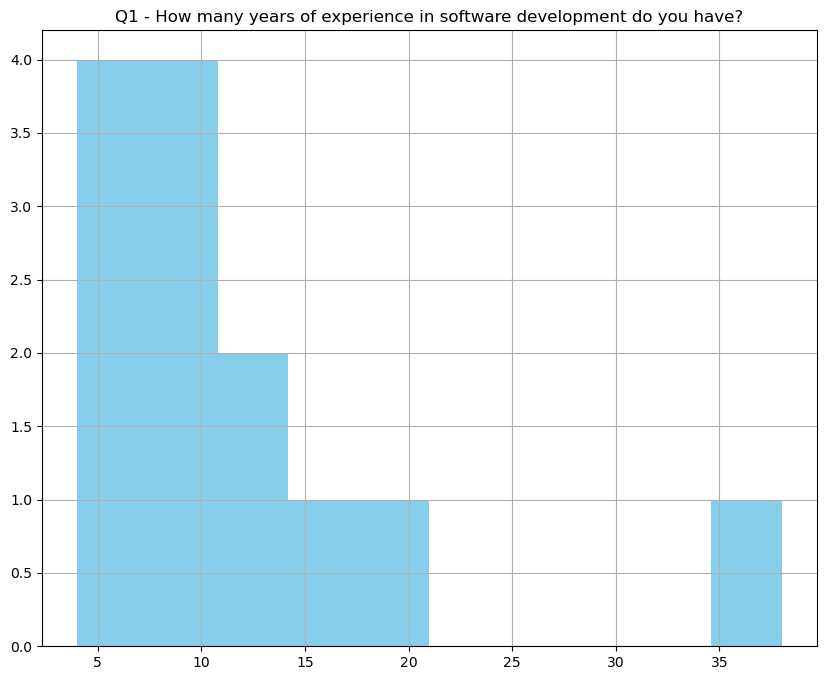

In [5]:
# ploit ahist with Q3 fig size (10, 8)
plt.figure(figsize=(10,8)) 
df['Q1'].hist(color='skyblue') #, edgecolor='black')
# set title 
plt.title('Q1 - How many years of experience in software development do you have?')
#save the plot as a png file
plt.savefig('Q1.png')

### Q2 - How many papers have you published related to ML?

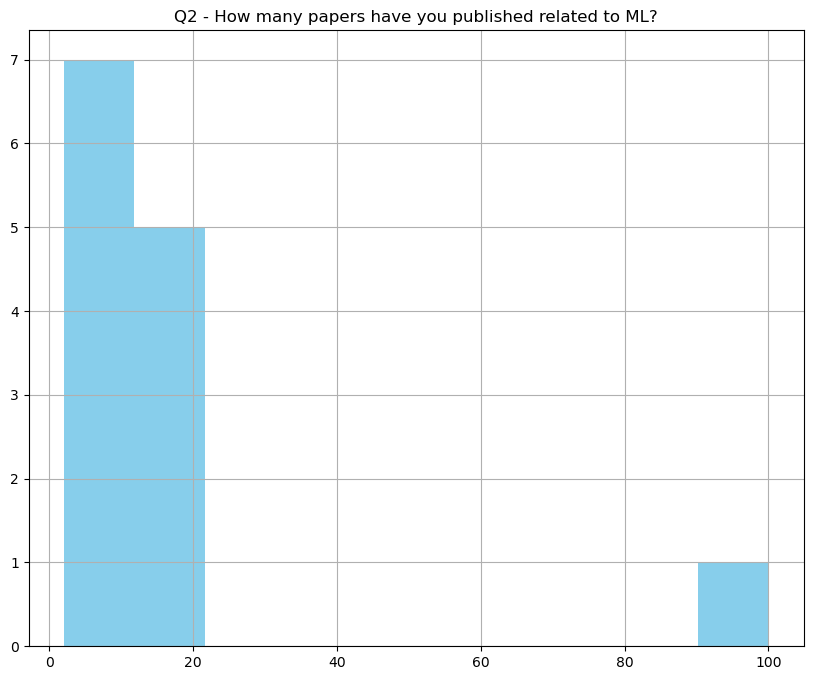

In [6]:
# ploit ahist with Q3 fig size (10, 8)
plt.figure(figsize=(10,8)) 
df['Q2'].hist(color='skyblue') #, edgecolor='black')
plt.title('Q2 - How many papers have you published related to ML?')
#save the plot as a png file
plt.savefig('Q2.png')

### Q3 - How many papers have you published related to SE without involving ML?

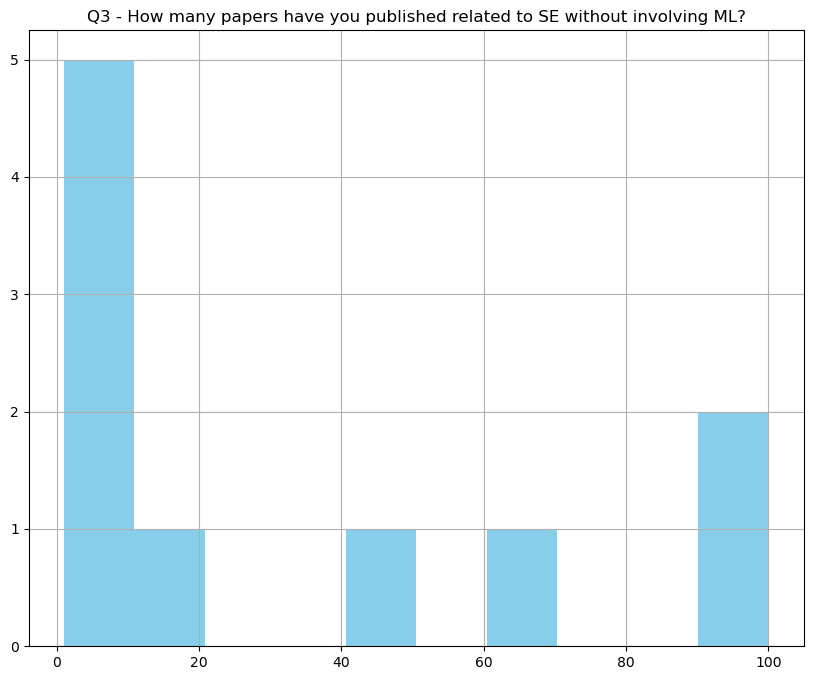

In [7]:
# ploit ahist with Q3 fig size (10, 8)
plt.figure(figsize=(10,8)) 
df['Q3'].hist(color='skyblue') #, edgecolor='black')
plt.title('Q3 - How many papers have you published related to SE without involving ML?')
#save the plot as a png file
plt.savefig('Q3.png')

### Q4 - How many papers have you published related to ML4SE?

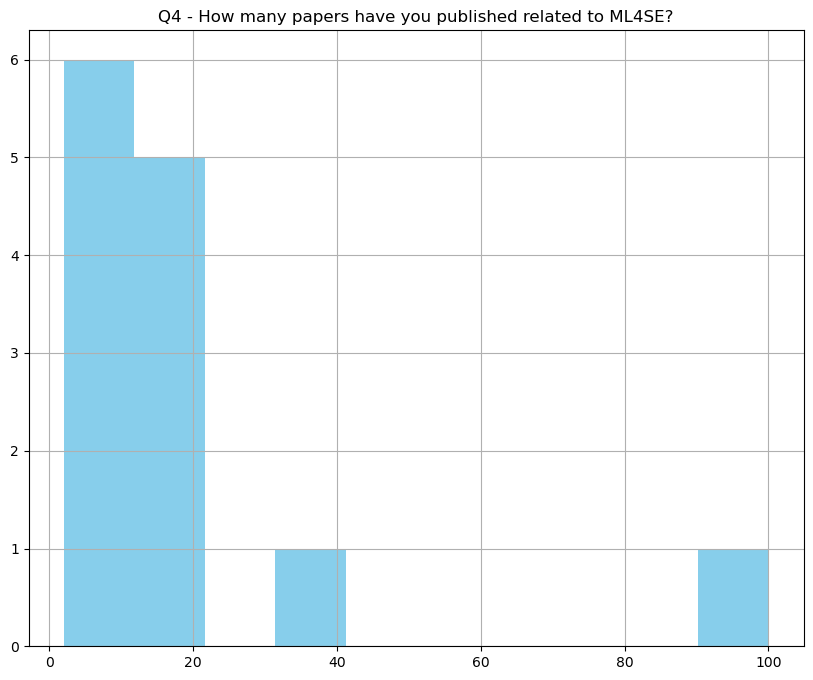

In [9]:
# ploit ahist with Q4
plt.figure(figsize=(10,8)) 
df['Q4'].hist(color='skyblue')
plt.title('Q4 - How many papers have you published related to ML4SE?')
#save the plot as a png file
plt.savefig('Q4.png')

### Q5 - How many papers have you published related to SE4ML?

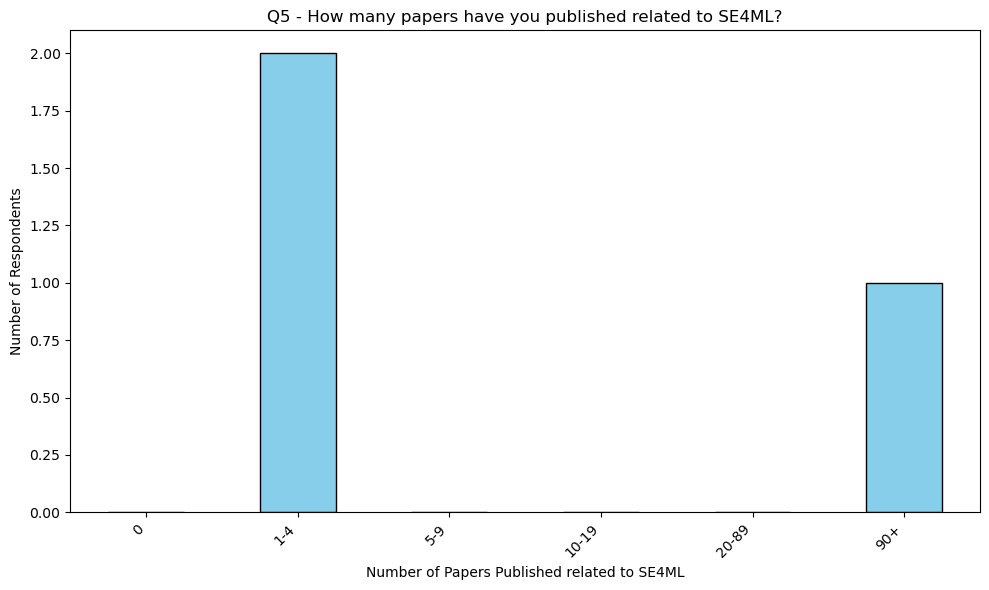

<Figure size 640x480 with 0 Axes>

In [10]:
# Define bins for grouping the number of papers
bins = [0, 1, 5, 10, 20, 90, 120]
labels = ['0', '1-4', '5-9', '10-19', '20-89', '90+']

# Create a new column with binned data
df['Num_Papers_Binned'] = pd.cut(
    df['Q5'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)

# Count the number of respondents in each bin
paper_counts = df['Num_Papers_Binned'].value_counts().sort_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
paper_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Number of Papers Published related to SE4ML')
plt.ylabel('Number of Respondents')
plt.title('Q5 - How many papers have you published related to SE4ML?')

# Adjust x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust the bottom margin to accommodate rotated labels
plt.subplots_adjust(bottom=0.2)

plt.tight_layout()
plt.show()

#save the plot as a png file
plt.savefig('Q5.png')

### Q6 - What venues do you tend/prefer to publish in? (journals/conferences)

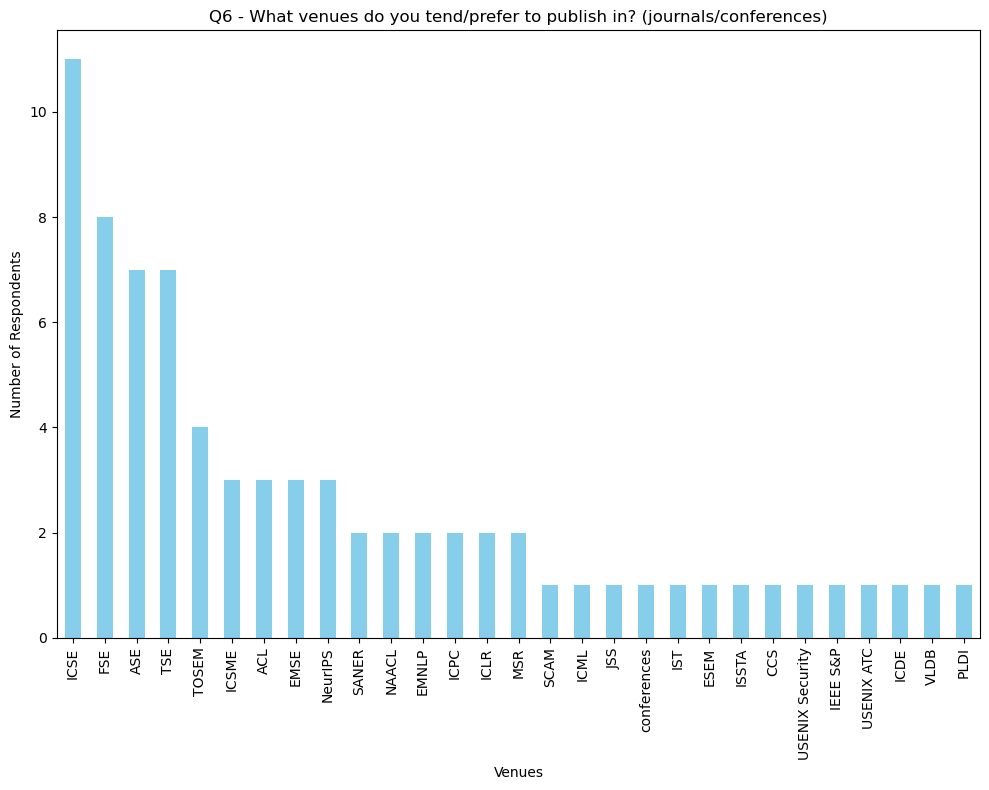

In [11]:
df['Venue_List'] = df['Q6'].str.split(',')
exploded_df = df.explode('Venue_List')
# Clean up the venue names by removing leading/trailing whitespaces
exploded_df['Venue_List'] = exploded_df['Venue_List'].str.strip()
# Count the occurrences of each venue
venue_counts = exploded_df['Venue_List'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 8))
venue_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Venues')
plt.ylabel('Number of Respondents')
plt.title('Q6 - What venues do you tend/prefer to publish in? (journals/conferences)')
#save the plot as a png file
plt.savefig('Q6.png')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Q7 - How would you describe your primary role?

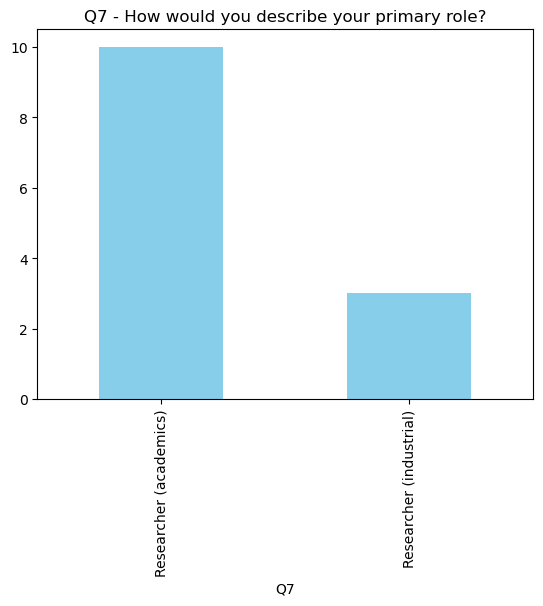

In [12]:
df['Q7'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Q7 - How would you describe your primary role?')
#save the plot as a png file
plt.savefig('Q7.png')

### Q8 - What is your highest level of education?

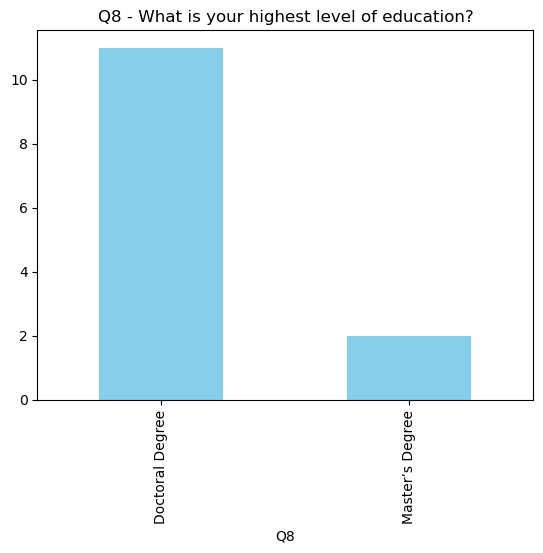

In [13]:
df['Q8'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Q8 - What is your highest level of education?')
#save the plot as a png file
plt.savefig('Q8.png')

### Q9 - Which programming languages have you frequently used in past project(s)?

In [14]:
# Create a new not empty true or false otherwise column
df['Q9-Other-bool'] = df['Q9-Other'].notnull() 

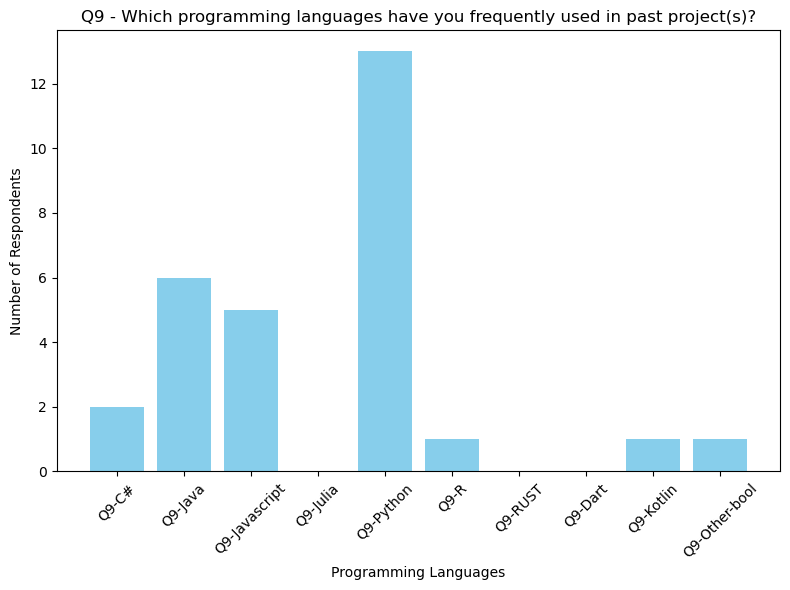

In [15]:
language_columns_ML = ['Q9-C#', 'Q9-Java','Q9-Javascript','Q9-Julia','Q9-Python','Q9-R','Q9-RUST','Q9-Dart','Q9-Kotlin', 'Q9-Other-bool']
language_counts_ML = df[language_columns_ML].sum()
# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(language_counts_ML.index, language_counts_ML.values, color='skyblue')
plt.xlabel('Programming Languages')
plt.ylabel('Number of Respondents')
plt.title('Q9 - Which programming languages have you frequently used in past project(s)?')
#save the plot as a png file
plt.savefig('Q9.png')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Q10 - Which types of Learning approaches have you use?

In [16]:
# Create a new not empty true or false otherwise column
df['Q10-Other-bool'] = df['Q10-Other'].notnull() 

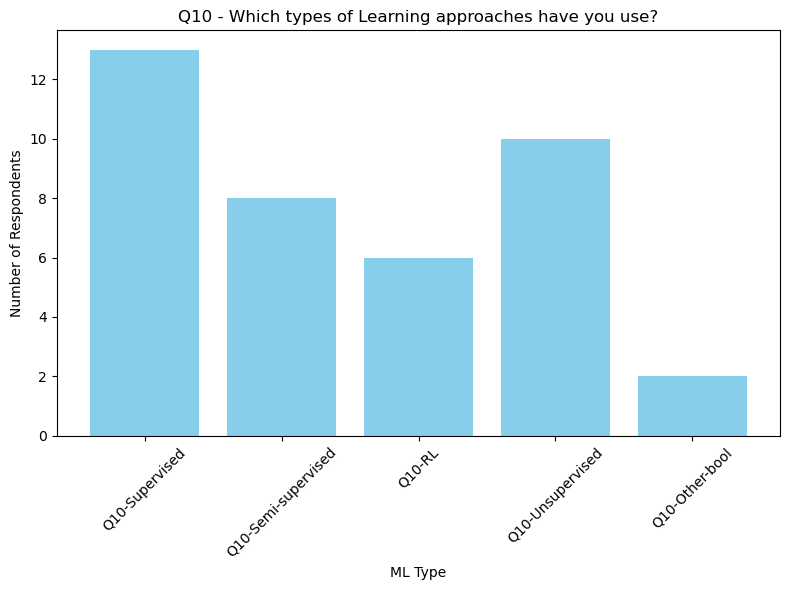

In [17]:
ML_type_columns = ['Q10-Supervised','Q10-Semi-supervised','Q10-RL', 'Q10-Unsupervised','Q10-Other-bool']
ML_type_c_counts = df[ML_type_columns].sum()
# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(ML_type_c_counts.index, ML_type_c_counts.values, color='skyblue')
plt.xlabel('ML Type')
plt.ylabel('Number of Respondents')
plt.title('Q10 - Which types of Learning approaches have you use?')
#save the plot as a png file
plt.savefig('Q10.png')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Q11 - What types of ML tasks have you use?

In [18]:
# Create a new not empty true or false otherwise column
df['Q11-Other-bool'] = df['Q11-other'].notnull() 

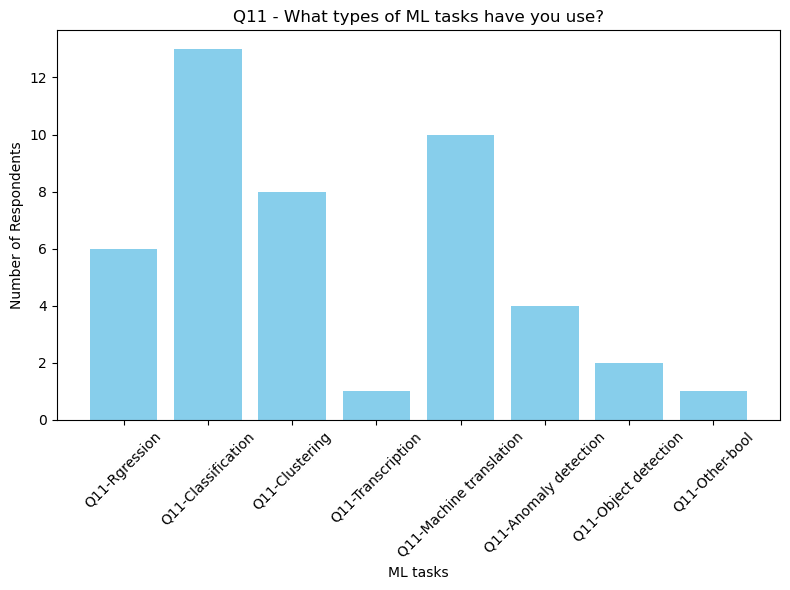

In [19]:
ML_task_columns = ['Q11-Rgression', 'Q11-Classification', 'Q11-Clustering', 'Q11-Transcription', 'Q11-Machine translation', 'Q11-Anomaly detection','Q11-Object detection','Q11-Other-bool']
ML_task_c_counts = df[ML_task_columns].sum()
# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(ML_task_c_counts.index, ML_task_c_counts.values, color='skyblue')
plt.xlabel('ML tasks')
plt.ylabel('Number of Respondents')
plt.title('Q11 - What types of ML tasks have you use?')
#save the plot as a png file
plt.savefig('Q11.png')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Q12 - What types of systems have you developed involving ML?

In [20]:
# Create a new not empty true or false otherwise column
df['Q12-Other-bool'] = df['Q12-Other'].notnull() 

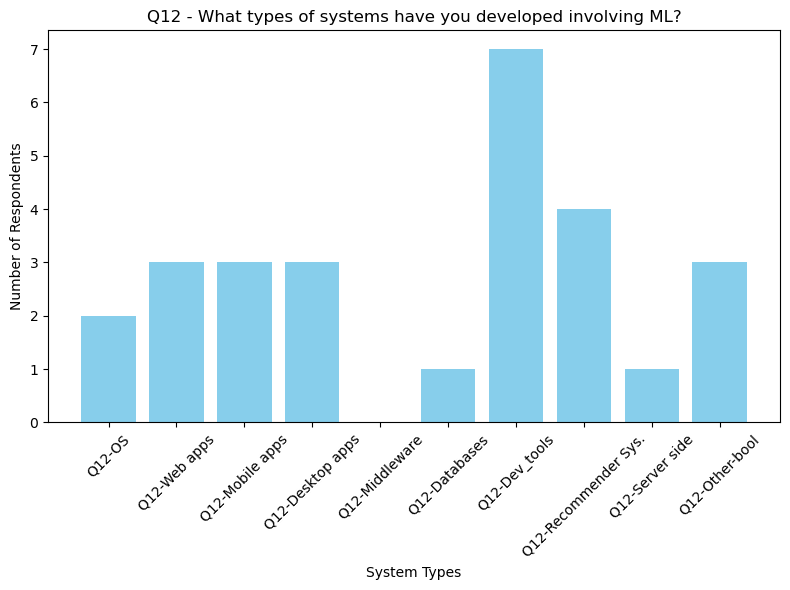

In [21]:
sys_types_columns = ['Q12-OS', 'Q12-Web apps', 'Q12-Mobile apps', 'Q12-Desktop apps', 'Q12-Middleware', 'Q12-Databases', 'Q12-Dev_tools', 'Q12-Recommender Sys.', 'Q12-Server side','Q12-Other-bool']
sys_types_counts = df[sys_types_columns].sum()
# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(sys_types_counts.index, sys_types_counts.values, color='skyblue')
plt.xlabel('System Types')
plt.ylabel('Number of Respondents')
plt.title('Q12 - What types of systems have you developed involving ML?')
#save the plot as a png file
plt.savefig('Q12.png')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




### Q13 - Have you primarily work on open source or closed source projects?

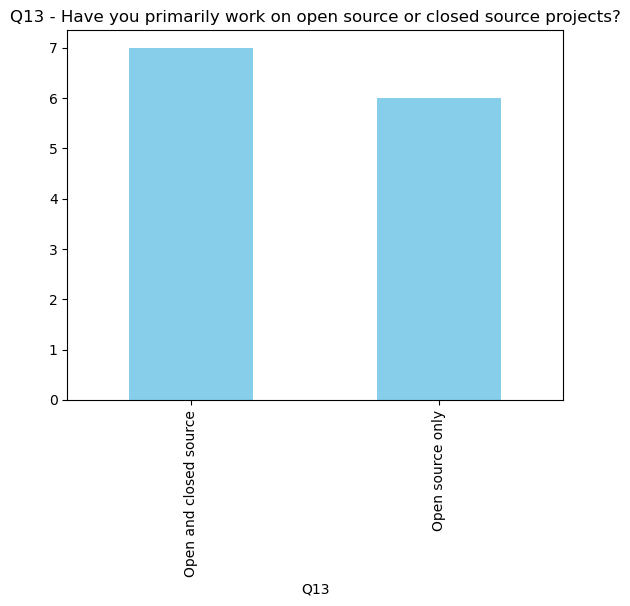

In [22]:
df['Q13'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Q13 - Have you primarily work on open source or closed source projects?')
#save the plot as a png file
plt.savefig('Q13.png')

### Q14 - For which domains (e.g., banking or healthcare) have you developed applications / systems?

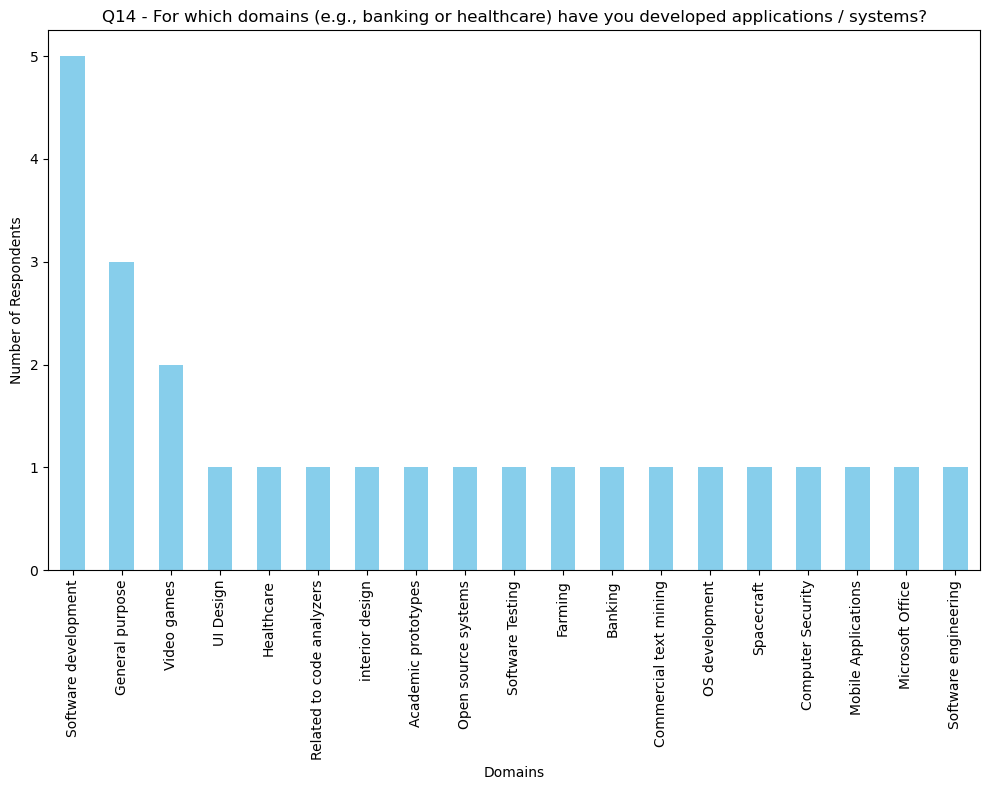

In [23]:
df['domain_List'] = df['Q14'].str.split(',')
exploded_df = df.explode('domain_List')
# Clean up the domains by removing leading/trailing whitespaces
exploded_df['domain_List'] = exploded_df['domain_List'].str.strip()
# Count the occurrences of each domain
domain_counts = exploded_df['domain_List'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 8))
domain_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Domains')
plt.ylabel('Number of Respondents')
plt.title('Q14 - For which domains (e.g., banking or healthcare) have you developed applications / systems?')
#save the plot as a png file
plt.savefig('Q14.png')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Q15 - Do you have a background in machine learning?

<Figure size 900x600 with 0 Axes>

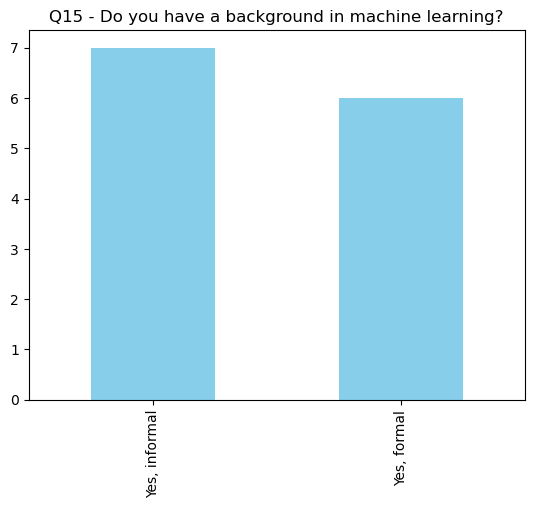

<Figure size 900x600 with 0 Axes>

In [24]:
### plot q15 and add a x title custom
df['Q15'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('')
plt.title('Q15 - Do you have a background in machine learning?')
#save the plot as a png file
plt.savefig('Q15.png')
plt.figure(figsize=(9, 6))

### Q16 - Do you have a background in software engineering research?

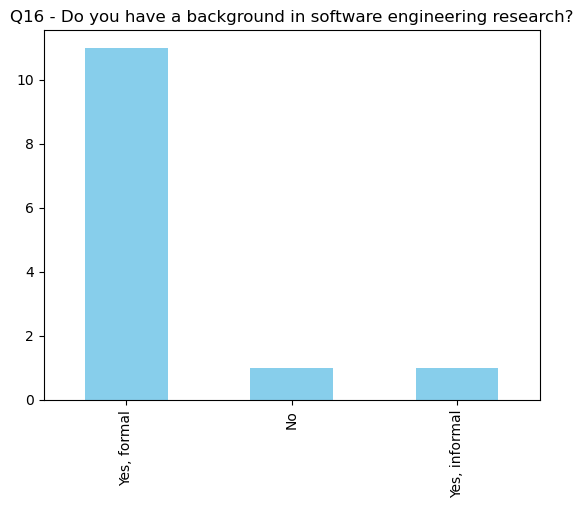

<Figure size 900x600 with 0 Axes>

In [25]:
### plot q15 and add a x title custom
df['Q16'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('')
plt.title('Q16 - Do you have a background in software engineering research?')
plt.figure(figsize=(9, 6))
#save the plot as a png file
plt.savefig('Q16.png')

#### Note: note that we have one NO as a response. This was clarified with the participant in the interview, and was a missunderstanding of the question.

### Q17 - When researching software engineering, do you keep track of your approaches/ models + dataset?, Which versioning systems have you  used (e.g., CML, DVC, Git)?

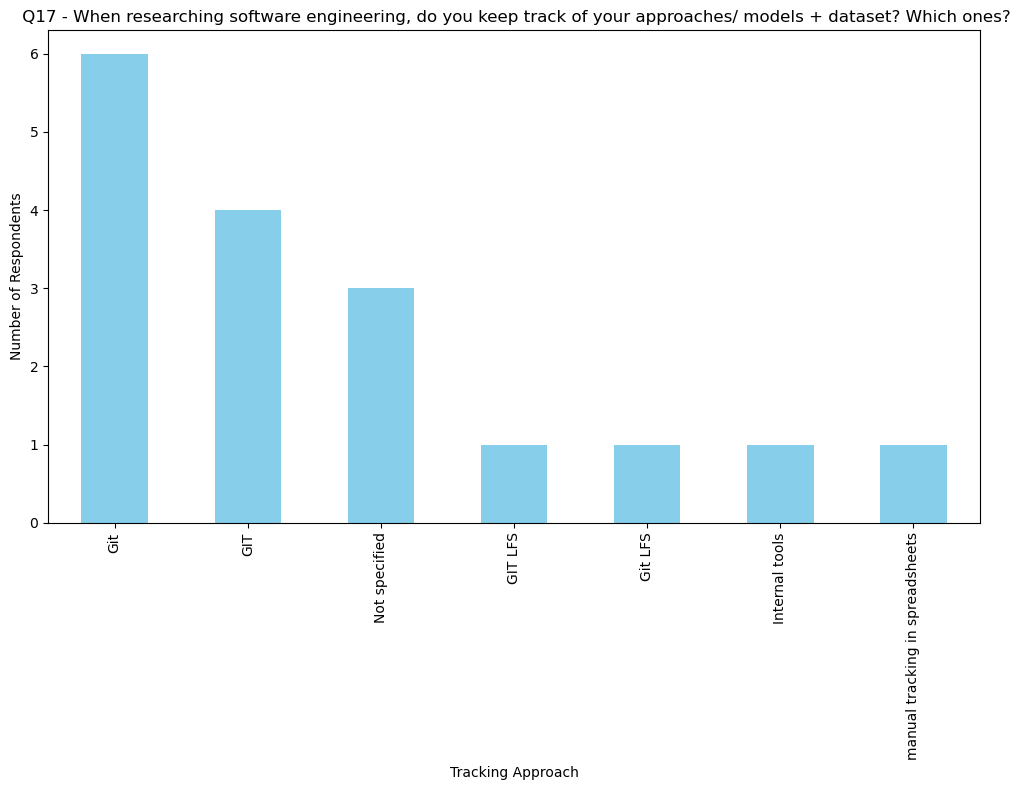

In [26]:

df['Q17'] = df['Q17'].str.replace('Yes:', '')
df['Q17'] = df['Q17'].str.replace('Yes', 'Not specified')
df['track_List'] = df['Q17'].str.split(',')
exploded_df = df.explode('track_List')
# Clean up the domains by removing leading/trailing whitespaces
exploded_df['track_List'] = exploded_df['track_List'].str.strip()
# Count the occurrences of each domain
domain_counts = exploded_df['track_List'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 8))
domain_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Tracking Approach')
plt.ylabel('Number of Respondents')
plt.title(' Q17 - When researching software engineering, do you keep track of your approaches/ models + dataset? Which ones?')
#save the plot as a png file
plt.savefig('Q17.png')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Q18 - How often did you release or help release a new major version of ML models over the past two years? Please give your best estimate.

<Figure size 900x600 with 0 Axes>

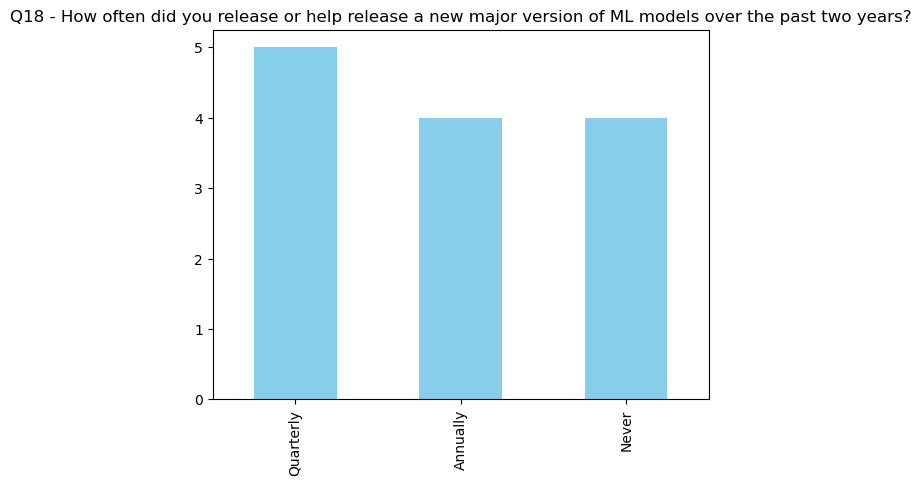

<Figure size 900x600 with 0 Axes>

In [27]:
# plot q19
df['Q18'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('')
plt.title('Q18 - How often did you release or help release a new major version of ML models over the past two years?')
#save the plot as a png file
plt.savefig('Q18.png')
plt.figure(figsize=(9, 6))

### Q19 - Which country / countries are you and / or your organization based in?

<Figure size 900x600 with 0 Axes>

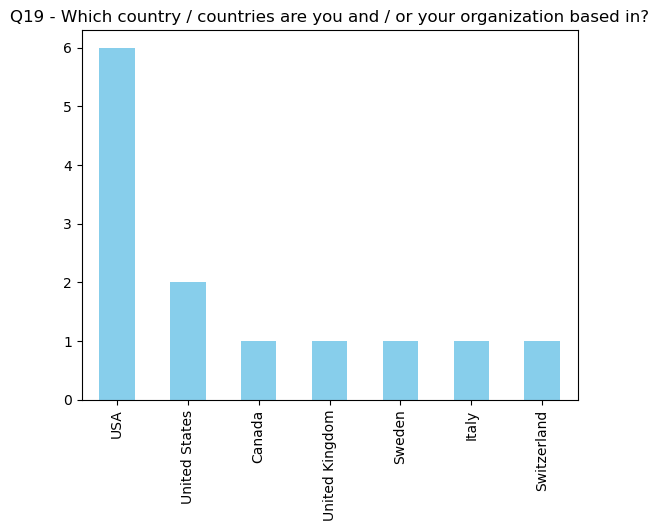

<Figure size 900x600 with 0 Axes>

In [28]:
# plot q19
df['Q19'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('')
plt.title('Q19 - Which country / countries are you and / or your organization based in?')# Organizations are not displayed
#save the plot as a png file
plt.savefig('Q19.png')
plt.figure(figsize=(9, 6))